# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Lecture 7 Exercise </center>

# <center>DBSCAN Clustering</center>


# Part A: Differentiate DBSCAN from KMean using any iris dataset

# Import Libraries

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris()



# 1. Data Manipulation with pandas

In [2]:
#load dataset here

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.drop(['petal width (cm)', 'sepal width (cm)'], axis = 1, inplace = True)
df

sepal length (cm)  petal length (cm)
0                  5.1                1.4
1                  4.9                1.4
2                  4.7                1.3
3                  4.6                1.5
4                  5.0                1.4
..                 ...                ...
145                6.7                5.2
146                6.3                5.0
147                6.5                5.2
148                6.2                5.4
149                5.9                5.1

[150 rows x 2 columns]

# 2. Data Exploration and Visualization

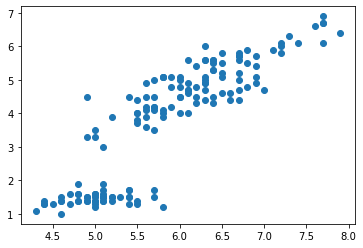

In [3]:

import matplotlib.pyplot as plt

x = df['sepal length (cm)']
y = df['petal length (cm)']
plt.scatter(x,y)
plt.show()



# 3. Training Model

## 3.1. KMean Clustering

In [4]:
#create kmean model(assuming two clusters) here and explore outputs 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
X = df[['sepal length (cm)', 'petal length (cm)']]
kmeans



KMeans(n_clusters=2, random_state=0)

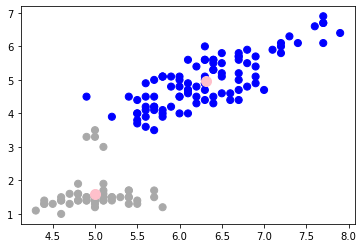

In [5]:
#plot clusters formed by Kmean

colors = np.array(['darkgray','blue', 'red'])
kmean = kmeans.predict(X)
plt.scatter(x=df['sepal length (cm)'], y = df['petal length (cm)'], c = colors[kmean], s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='pink', s=100);

## 3.2. DBSCAN Clustering

### create DBSCAN model here and compare output with KMean


In [6]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

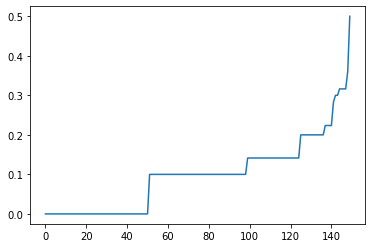

In [7]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [28]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.5,min_samples=3).fit(X)
label = db.labels_
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [29]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)

print('No of clusters:',n_clusters)

No of clusters: 2


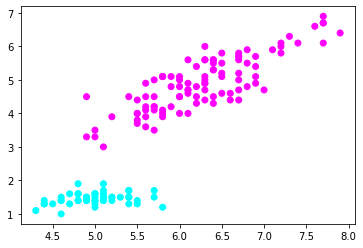

In [32]:
#Plot clusters formed by DBSCAN
import matplotlib.pyplot as plt
plt.scatter(x=df['sepal length (cm)'], y = df['petal length (cm)'], c = label, cmap= "cool")
plt.show()

# Part B: Differentiate DBSCAN from KMean on moon shaped dataset

`sklearn.datasets.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)`

#### - Generate moon-shaped dataset using make_moons() function. Plot clusters to compare clusters formed by Kmean and DBSCAN algorithm.


#### - Change eps value and min_sample value to explore their effect on the learning algorithm.





In [44]:
from sklearn.datasets import make_moons
moons = make_moons()

AttributeError: 'tuple' object has no attribute 'info'